In [34]:
import pandas as pd

import seaborn as sns

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from pathlib import Path

# UMAP

In [3]:
# Load test embedding

Umap = pd.read_feather("/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/250220_StdContacts_Ctrl_Data/UMAP/240225_UMAPTest.feather")

In [11]:
Umap.head()

,UMAP1,UMAP2,duration,fly,event_type,start,end,start_frame,end_frame,flypath,experiment,Nickname,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,event_id
0,9.827519,-1.020743,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,572.413793,573.758621,16600,16639,/mnt/upramdya_data/MD/MultiMazeRecorder/Videos...,230704_FeedingState_1_AM_Videos_Tracked,PR,Control,230704,PR,AM,starved_noWater,std,on,6
1,-0.886285,11.042871,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,174.344828,175.689655,5056,5095,/mnt/upramdya_data/MD/MultiMazeRecorder/Videos...,230704_FeedingState_1_AM_Videos_Tracked,PR,Control,230704,PR,AM,starved_noWater,std,on,1
2,-0.855251,4.845663,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,629.931034,631.275862,18268,18307,/mnt/upramdya_data/MD/MultiMazeRecorder/Videos...,230704_FeedingState_1_AM_Videos_Tracked,PR,Control,230704,PR,AM,starved_noWater,std,on,8
3,10.294092,-1.153607,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,1913.413793,1914.758621,55489,55528,/mnt/upramdya_data/MD/MultiMazeRecorder/Videos...,230704_FeedingState_1_AM_Videos_Tracked,PR,Control,230704,PR,AM,starved_noWater,std,on,8
4,18.972263,9.765047,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,1355.000000,1356.344828,39295,39334,/mnt/upramdya_data/MD/MultiMazeRecorder/Videos...,230704_FeedingState_1_AM_Videos_Tracked,PR,Control,230704,PR,AM,starved_noWater,std,on,1


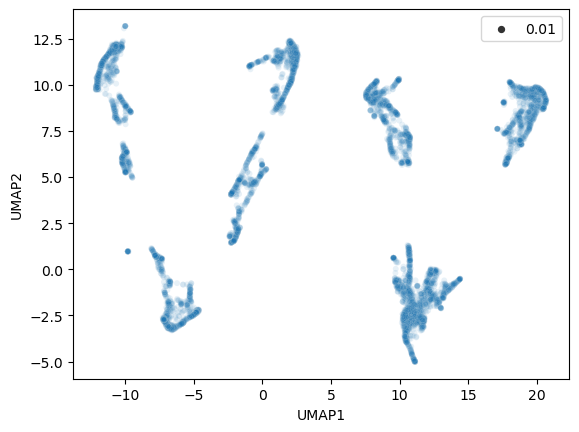

In [58]:
# Scatter plot of UMAP1 vs UMAP2

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1)

# save the plot

plt.savefig("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/UMAPTest.png")


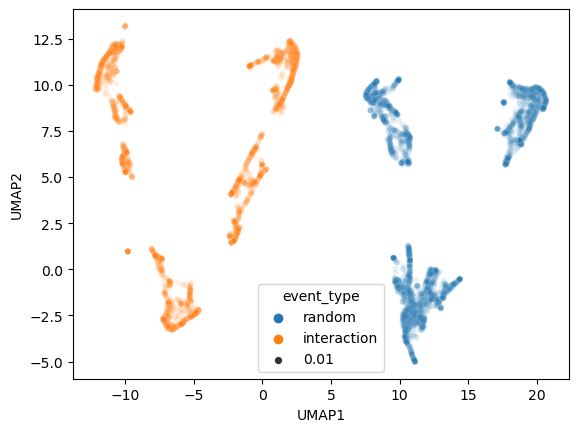

In [55]:
# Color code by event_type

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1, hue="event_type")

# Save the plot

plt.savefig("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/UMAP_event_types.png")

# Clustering

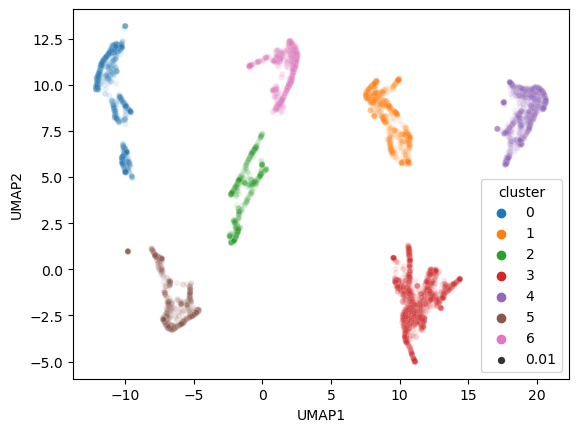

In [56]:
# Identify clusters based on KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(Umap[["UMAP1", "UMAP2"]])

Umap["cluster"] = kmeans.labels_

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1, hue="cluster", palette="tab10")

# Save the plot

plt.savefig("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/UMAP_Clusters.png")

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

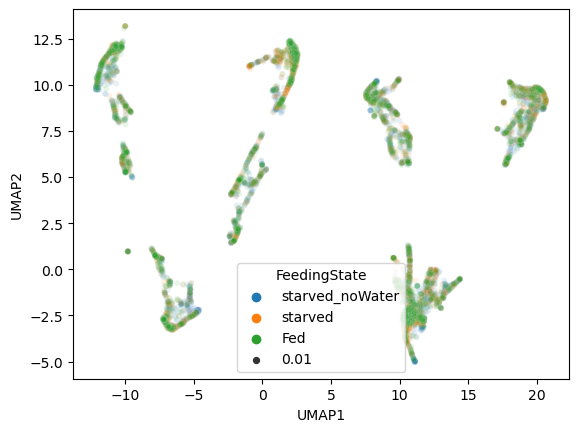

In [61]:
sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1, hue="FeedingState", palette="tab10")

In [28]:
# Load the source data

interaction_data =pd.read_feather("/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/250220_StdContacts_Ctrl_Data/standardized_contacts/230704_FeedingState_1_AM_Videos_Tracked_standardized_contacts.feather")

In [29]:
interaction_data.head()

,index,frame,time,object,x_Head,y_Head,x_Thorax,y_Thorax,x_Abdomen,y_Abdomen,...,Nickname,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light
0,0,2803,96.655172,fly_1,64.388405,287.625122,63.666183,299.842743,71.914757,323.605438,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
1,1,2804,96.689655,fly_1,64.215385,287.836578,63.560196,299.943542,71.748329,323.679352,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
2,2,2805,96.724138,fly_1,63.998486,287.934418,63.434326,299.958649,68.510117,320.559113,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
3,3,2806,96.758621,fly_1,63.984528,287.982361,63.417011,300.016968,71.644402,323.709839,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on
4,4,2807,96.793103,fly_1,63.739338,287.847534,60.387756,299.897339,68.478973,320.489594,...,PR,Control,PR,m,230704,PR,AM,starved_noWater,std,on


In [30]:
# Make a unique identifier as combination of fly, event_type and event_id

Umap["unique_id"] = Umap["fly"].astype(str) + "_" + Umap["event_type"] + "_" + Umap["event_id"].astype(str)

interaction_data["unique_id"] = interaction_data["fly"].astype(str) + "_" + interaction_data["event_type"] + "_" + interaction_data["event_id"].astype(str)

In [31]:
# As example get the cluster 0 and make a subset of interaction data that contains all unique_ids in cluster 0

cluster_0 = Umap[Umap["cluster"] == 0]

cluster_0_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_0["unique_id"])]
cluster_0_interactions.head()

,index,frame,time,object,x_Head,y_Head,x_Thorax,y_Thorax,x_Abdomen,y_Abdomen,...,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light,unique_id
0,0,2803,96.655172,fly_1,64.388405,287.625122,63.666183,299.842743,71.914757,323.605438,...,Control,PR,m,230704,PR,AM,starved_noWater,std,on,230704_FeedingState_1_AM_Videos_Tracked_arena2...
1,1,2804,96.689655,fly_1,64.215385,287.836578,63.560196,299.943542,71.748329,323.679352,...,Control,PR,m,230704,PR,AM,starved_noWater,std,on,230704_FeedingState_1_AM_Videos_Tracked_arena2...
2,2,2805,96.724138,fly_1,63.998486,287.934418,63.434326,299.958649,68.510117,320.559113,...,Control,PR,m,230704,PR,AM,starved_noWater,std,on,230704_FeedingState_1_AM_Videos_Tracked_arena2...
3,3,2806,96.758621,fly_1,63.984528,287.982361,63.417011,300.016968,71.644402,323.709839,...,Control,PR,m,230704,PR,AM,starved_noWater,std,on,230704_FeedingState_1_AM_Videos_Tracked_arena2...
4,4,2807,96.793103,fly_1,63.739338,287.847534,60.387756,299.897339,68.478973,320.489594,...,Control,PR,m,230704,PR,AM,starved_noWater,std,on,230704_FeedingState_1_AM_Videos_Tracked_arena2...


# Looping over all clusters

In [64]:
# Configuration parameters
MAX_CELL_WIDTH = 96   # Maximum width for grid cells
MAX_CELL_HEIGHT = 516  # Maximum height for grid cells
MAX_OUTPUT_WIDTH = 3840
MAX_OUTPUT_HEIGHT = 2160
FPS = 5
CODEC = "mp4v"
OUTPUT_DIR = "/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters"

def resize_with_padding(frame, target_w, target_h):
    """Resize frame while maintaining aspect ratio with padding"""
    h, w = frame.shape[:2]
    scale = min(target_w/w, target_h/h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    
    resized = cv2.resize(frame, (new_w, new_h))
    pad_w = target_w - new_w
    pad_h = target_h - new_h
    
    # Add equal padding on both sides
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    
    return cv2.copyMakeBorder(resized, top, bottom, left, right, 
                            cv2.BORDER_CONSTANT, value=(0,0,0))

def process_cluster(cluster_id, Umap, interaction_data):
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    cluster_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_data["unique_id"])]
    
    # Calculate frame ranges for each unique_id
    frame_ranges = (cluster_interactions
                    .groupby('unique_id')['frame']
                    .agg(frame_start=('min'), frame_end=('max'))
                    .reset_index())

    # Merge with path information
    event_metadata = (cluster_interactions[['unique_id', 'flypath']]
                      .drop_duplicates()
                      .merge(frame_ranges, on='unique_id'))

    # Calculate grid layout based on max output dimensions
    cols = MAX_OUTPUT_WIDTH // MAX_CELL_HEIGHT  # Note the swapped dimensions
    rows = MAX_OUTPUT_HEIGHT // MAX_CELL_WIDTH  # Note the swapped dimensions
    max_events = cols * rows

    # Sample events if needed
    if len(event_metadata) > max_events:
        event_metadata = event_metadata.sample(max_events, random_state=42)

    # Initialize frame storage and video metadata
    frames_dict = {}
    max_duration = 0
    valid_events = 0

    # Process videos in optimized groups
    for flypath, group in event_metadata.groupby('flypath'):
        video_files = list(Path(flypath).glob("*.mp4"))
        video_file = next((vf for vf in video_files if "_preprocessed" not in vf.stem), None)
        
        if not video_file:
            print(f"Skipping {flypath} - no suitable MP4 found")
            continue

        cap = cv2.VideoCapture(str(video_file))
        if not cap.isOpened():
            print(f"Couldn't open {video_file}")
            continue

        # Process all events from this video
        for _, event in group.iterrows():
            try:
                start = int(event['frame_start'])
                end = int(event['frame_end'])
                if start > end:
                    print(f"Invalid frames for {event['unique_id']}")
                    continue
                    
                # Read event frames with boundary checks
                cap.set(cv2.CAP_PROP_POS_FRAMES, start)
                frames = []
                for _ in range(end - start + 1):
                    ret, frame = cap.read()
                    if not ret:
                        break
                    # Rotate frame 90° clockwise
                    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
                    # Convert color space and resize with padding
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame = resize_with_padding(frame, MAX_CELL_HEIGHT, MAX_CELL_WIDTH)  # Note the swapped dimensions
                    frames.append(frame)
                
                if frames:
                    frames_dict[event['unique_id']] = frames
                    max_duration = max(max_duration, len(frames))
                    valid_events += 1

            except Exception as e:
                print(f"Error processing {event['unique_id']}: {str(e)}")
        
        cap.release()

    # Early exit if no valid events
    if valid_events == 0:
        raise ValueError(f"No processable events found for cluster {cluster_id}")

    # Pad all clips to max duration with black frames
    for uid in frames_dict:
        frames = frames_dict[uid]
        if len(frames) < max_duration:
            padding = [np.zeros((MAX_CELL_WIDTH, MAX_CELL_HEIGHT, 3), dtype=np.uint8)] * (max_duration - len(frames))  # Note the swapped dimensions
            frames_dict[uid] = frames + padding

    # Final output dimensions
    output_size = (cols * MAX_CELL_HEIGHT, rows * MAX_CELL_WIDTH)  # Note the swapped dimensions

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*CODEC)
    output_path = Path(OUTPUT_DIR) / f"cluster_{cluster_id}_video.mp4"
    out = cv2.VideoWriter(str(output_path), fourcc, FPS, output_size)

    # Generate grid frames
    for frame_idx in range(max_duration):
        grid = np.zeros((output_size[1], output_size[0], 3), dtype=np.uint8)
        
        for idx, (uid, frames) in enumerate(frames_dict.items()):
            if frame_idx >= len(frames):
                continue
                
            row = idx // cols
            col = idx % cols
            
            # Calculate position
            x = col * MAX_CELL_HEIGHT  # Note the swapped dimensions
            y = row * MAX_CELL_WIDTH  # Note the swapped dimensions
            
            # Place frame in grid cell
            grid[y:y+MAX_CELL_WIDTH, x:x+MAX_CELL_HEIGHT] = frames[frame_idx]  # Note the swapped dimensions

        out.write(cv2.cvtColor(grid, cv2.COLOR_RGB2BGR))

    out.release()
    print(f"Successfully created grid video for cluster {cluster_id} at {output_path}")

In [63]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Create output directory if it doesn't exist
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# Process each cluster
for cluster_id in unique_clusters:
    try:
        process_cluster(cluster_id, Umap, interaction_data)
    except Exception as e:
        print(f"Error processing cluster {cluster_id}: {str(e)}")


Successfully created aspect-ratio-preserving grid video for cluster 3 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/cluster_3_video_full.mp4
Successfully created aspect-ratio-preserving grid video for cluster 6 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/cluster_6_video_full.mp4
Successfully created aspect-ratio-preserving grid video for cluster 2 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/cluster_2_video_full.mp4
Successfully created aspect-ratio-preserving grid video for cluster 4 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/cluster_4_video_full.mp4
Successfully created aspect-ratio-preserving grid video for cluster 0 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250226_Clusters/cluster_0_video_full.mp4
Successfully created aspect-ratio-preserving grid video